In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [4]:
train_set = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
test_set = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [5]:
for data in train_set:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [24]:
x = data[0][0]
y = data[1][0]

print(y)


tensor(3)


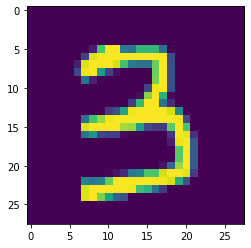

In [25]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [8]:
class Model(nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,64)
    self.fc5 = nn.Linear(64,10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.fc5(x)
    return F.log_softmax(x, dim = 1)

model = Model()
print(model)

Model(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
x_input = torch.rand((28,28))
x_input = x_input.view(-1, 28*28)

In [10]:
output = model(x_input)

In [11]:
output

tensor([[-2.3362, -2.2738, -2.3402, -2.3561, -2.3473, -2.3596, -2.2774, -2.2149,
         -2.3584, -2.1811]], grad_fn=<LogSoftmaxBackward>)

In [12]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in train_set:
    x_input, y = data
    model.zero_grad()
    output = model(x_input.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()

  print(loss)



tensor(0.0203, grad_fn=<NllLossBackward>)
tensor(0.0207, grad_fn=<NllLossBackward>)
tensor(0.0223, grad_fn=<NllLossBackward>)


In [13]:
correct = 0
total = 0

with torch.no_grad():
  for data in train_set:
    x_input, y = data
    output = model(x_input.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1


print("Accuracy : ", round(correct/total, 3))

Accuracy :  0.969


In [14]:
x_input

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

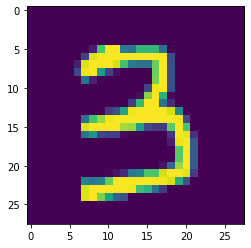

In [21]:
plt.imshow(x_input[0].view(28,28))


In [23]:
torch.argmax(model(x_input[0].view(-1, 784))[0])

tensor(3)